In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = "/home/lgold/phd/research/projects/connectivity/rna_folding/data/RNA12/alt_alphabets/four_letters/"
ph_path = path + "phenotypes.txt"

# read phenotype robustness and phenotype count of each file into a
# 11 x 274 x 2 array, where 11 stands for the 11 different base-pairing and
# hence g-p maps, 274 is the number of possible phenotypes and 2 stands for
# robustness and phenotype count data.
data = np.zeros(shape=(11, 274, 2), dtype=np.float64)

for i in range(2, 12):
    data_path = path + f"graph4_{i}/analysis/" + "RNA12_mfe_gpmap_gc_rand_robustness.txt"
    ph_count_path = path + f"graph4_{i}/analysis/" + "RNA12_mfe_gpmap_gc_rand_ph_count.txt"
    with open(data_path, "r") as file:
        for line in file:
            ph, robustness = line.strip().split(' ')  # ex. line: 10 0.333
            data[i-2, int(ph)-1, 1] = float(robustness)
    with open(ph_count_path, "r") as file:
        for ph, line in enumerate(file):  # the ith line for the ith+1 phenoty.
            data[i-2, int(ph), 0] = int(line.strip())

/tmp/ipykernel_193819/591758667.py:5: RuntimeWarning: divide by zero encountered in log
  ph_freq = np.log(ph_count / 4**12)


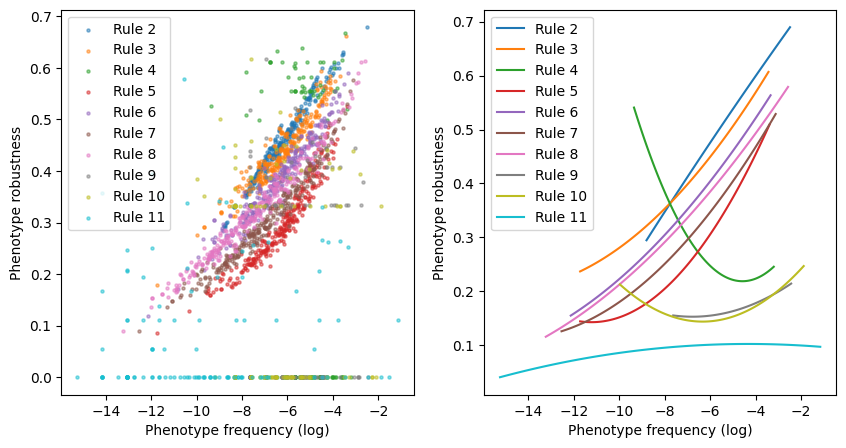

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for i in range(0, 10):
    ph_count = data[i, :, 0]
    ph_freq = np.log(ph_count / 4**12)
    robustness = data[i, :, 1]
    ax1.scatter(ph_freq, robustness, label=f"Rule {i+2}", s=5, alpha=0.5)
    
    non_inf_indices = np.where(ph_freq != -np.inf)[0]
    ph_freq_ = ph_freq[non_inf_indices]
    robustness_ = robustness[non_inf_indices]
    z = np.polyfit(ph_freq_, robustness_, 2)
    p = np.poly1d(z)
    xp = np.linspace(np.min(ph_freq_), np.max(ph_freq_), 100)
    ax2.plot(xp, p(xp), label=f"Rule {i+2}")
    
ax1.set_xlabel("Phenotype frequency (log)")
ax1.set_ylabel("Phenotype robustness")
ax1.legend()
ax2.set_xlabel("Phenotype frequency (log)")
ax2.set_ylabel("Phenotype robustness")
ax2.legend()
plt.show()

/tmp/ipykernel_193819/2635709140.py:4: RuntimeWarning: divide by zero encountered in log
  ph_freq = np.log(ph_count / 4**12)


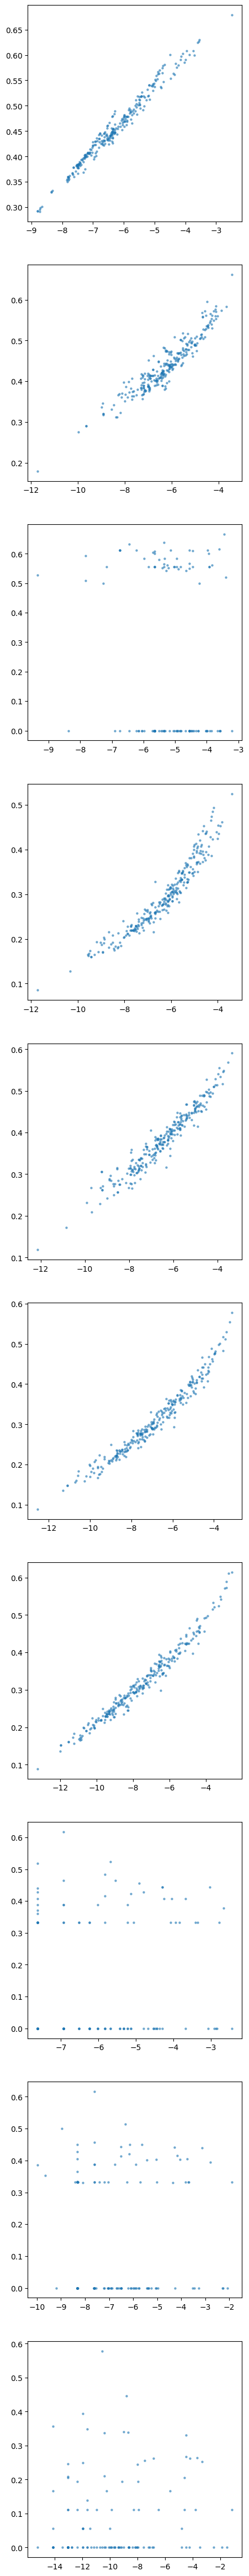

In [7]:
fig, axes = plt.subplots(10, 1, figsize=(5, 60))
for i in range(0, 10):
    ph_count = data[i, :, 0]
    ph_freq = np.log(ph_count / 4**12)
    robustness = data[i, :, 1]
    axes[i].scatter(ph_freq, robustness, label=f"Rule {i+2}", s=5, alpha=0.5)

    
# ax1.set_xlabel("Phenotype frequency (log)")
# ax1.set_ylabel("Phenotype robustness")
# ax1.legend()
# ax2.set_xlabel("Phenotype frequency (log)")
# ax2.set_ylabel("Phenotype robustness")
# ax2.legend()
# plt.show()